<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/python_ml_book_c2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image 

In [0]:
import numpy as np 

class Perceptron(object): 
  def __init__(self,eta=0.01,n_iter=50,random_state=1):
    self.eta = eta 
    self.n_iter = n_iter
    self.random_state = random_state 
    
  def fit(self,x,y): 
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0,scale=0.01,size=1+x.shape[1]) 
    self.errors_ = [] 
    
    for _ in range(self.n_iter):
      errors = 0 
      for xi,target in zip(x,y):
        update = self.eta * (target-self.predict(xi))
        self.w_[1:] += update * xi 
        self.w_[0] += update 
        errors += int(update != 0.0)
      self.errors_.append(errors) 
    return self 

  def net_input(self,x):
    return np.dot(x,self.w_[1:]) + self.w_[0] 
    
  def predict(self,x): 
    return np.where(self.net_input(x)>=0.0,1,-1) 


In [7]:
v1 = np.array([1,2,3]) 
v2 = 0.5*v1 
np.arccos(v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

0.0

In [8]:
import pandas as pd 

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data',header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.head() 

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.tail() 

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


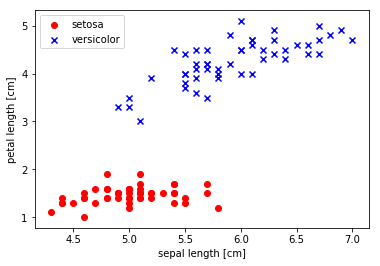

In [14]:
%matplotlib inline 

import matplotlib.pyplot as plt 
import numpy as np 

y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',-1,1) 

x = df.iloc[0:100,[0,2]].values

plt.scatter(x[:50,0],x[:50,1],
            color='red',marker='o',label='setosa') 
plt.scatter(x[50:100,0],x[50:100,1],
            color='blue',marker='x',label='versicolor') 

plt.xlabel('sepal length [cm]') 
plt.ylabel('petal length [cm]') 
plt.legend(loc='upper left')

plt.show() 

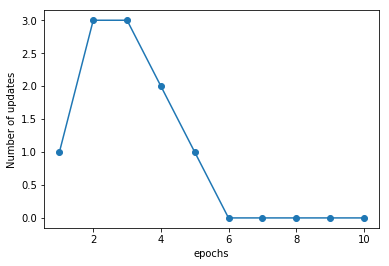

In [15]:
ppn = Perceptron(eta=0.1,n_iter=10) 

ppn.fit(x,y) 

plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o') 
plt.xlabel('epochs')
plt.ylabel('Number of updates') 

plt.show() 

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

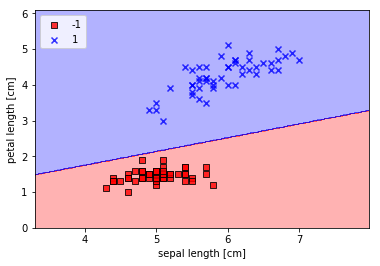

In [19]:
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [0]:
class  AdalineGD(object):
  
  def __init__(self,eta=0.01,n_iter=50,random_state=1):
    self.eta = eta 
    self.n_iter = n_iter
    self.random_state = random_state
    
  def fit(self,x,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0,scale=0.01,size=1+x.shape[1]) 
    self.cost_ = [] 
    
    for i in range(self.n_iter):
      net_input = self.net_input(x) 
      output = self.activation(net_input)
      errors = (y-output) 
      self.w_[1:] += self.eta*x.T.dot(errors) 
      self.w_[0] += self.eta*errors.sum() 
      
      cost = (errors**2).sum()/2.0
      self.cost_.append(cost) 
    return self

  def net_input(self,x):
    return np.dot(x,self.w_[1:])+self.w_[0]
  
  def activation(self,x):
    return x 
  
  def predict(self,x):
    return np.where(self.activation(self.net_input(x))>=0.0,1,-1)

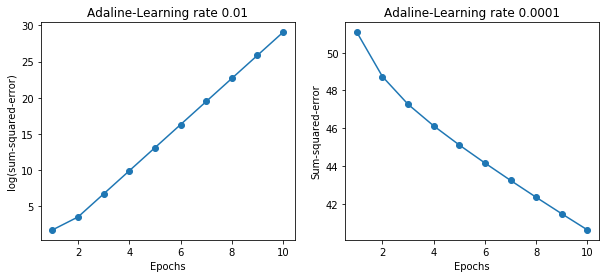

In [22]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4)) 

adal = AdalineGD(n_iter=10,eta=0.01).fit(x,y) 
ax[0].plot(range(1,len(adal.cost_)+1),np.log10(adal.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(sum-squared-error)')
ax[0].set_title('Adaline-Learning rate 0.01') 

ada2 = AdalineGD(n_iter=10,eta=0.0001).fit(x,y)
ax[1].plot(range(1,len(ada2.cost_)+1),ada2.cost_,marker='o')
ax[1].set_xlabel('Epochs') 
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline-Learning rate 0.0001') 

plt.show() 

In [0]:
x_std = np.copy(x)

x_std[:,0] = (x[:,0]-x[:,0].mean())/x[:,0].std()
x_std[:,1] = (x[:,1]-x[:,1].mean())/x[:,1].std() 

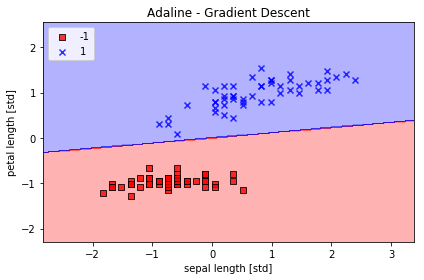

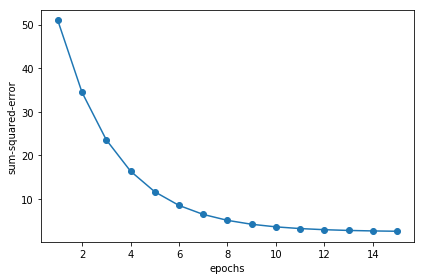

In [25]:
ada = AdalineGD(n_iter=15,eta=0.01) 
ada.fit(x_std,y)

plot_decision_regions(x_std,y,classifier=ada)
plt.title('Adaline - Gradient Descent') 
plt.xlabel('sepal length [std]') 
plt.ylabel('petal length [std]') 
plt.legend(loc='upper left') 
plt.tight_layout() 

plt.show() 

plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('epochs') 
plt.ylabel('sum-squared-error') 

plt.tight_layout()
plt.show() 

In [0]:
class AdalineSGD(object):
  
  def __init__(self,eta=0.01,n_iter=10,shuffle=True,random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle =  shuffle
    self.random_state = random_state 
    
  def fit(self,x,y):
    self._initialize_weights(x.shape[1]) 
    self.cost_ = [] 
    for i in range(self.n_iter):
      if self.shuffle:
        x,y = self._shuffle(x,y)
        cost = [] 
        for xi , target in zip(x,y):
          cost.append(self._update_weights(xi,target)) 
        avg_cost = sum(cost)/len(y) 
        self.cost_.append(avg_cost) 
    return self 
  
  
  def partial_fit(self,x,y):
    if not self.w_initialized:
      self._initialize_weights(x.shape[1]) 
      
    if y.ravel().shape[0] > 1 : 
      for xi , target in zip(x,y):
        self._update_weights(xi,target)
    else: 
      self._update_weights(x,y)
    return self
  
  def _shuffle(self,x,y):
    r = self.rgen.permutatin(len(y))
    
    return x[r],y[r]
  
  
  def _initialize_weights(self,m):
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0,scale=0.01,size=1+m) 
    self.w_initialized = True
    
  def _update_weights(self,xi,target):
    output = self.activation(self.net_input(xi)) 
    
    error = (target-output) 
    self.w_[1:] += 